# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime
import time

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url + city)
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shostka
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | auki
Processing Record 6 of Set 1 | tolanaro
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | bodo
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | bayanhongor
Processing Record 13 of Set 1 | maloye ganyushkino
Processing Record 14 of Set 1 | palmas
Processing Record 15 of Set 1 | puerto baquerizo moreno
Processing Record 16 of Set 1 | okha
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | peniche
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | salug
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | remire-montjoly


Processing Record 41 of Set 4 | phang nga
Processing Record 42 of Set 4 | wynyard
Processing Record 43 of Set 4 | saquarema
Processing Record 44 of Set 4 | soata
Processing Record 45 of Set 4 | pelplin
Processing Record 46 of Set 4 | zeya
Processing Record 47 of Set 4 | lakatoro
Processing Record 48 of Set 4 | nuriootpa
Processing Record 49 of Set 4 | kisangani
Processing Record 0 of Set 5 | punta arenas
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | isafjordur
Processing Record 3 of Set 5 | gueltat zemmour
City not found. Skipping...
Processing Record 4 of Set 5 | colonia
Processing Record 5 of Set 5 | aasiaat
Processing Record 6 of Set 5 | port-saint-louis-du-rhone
Processing Record 7 of Set 5 | wotho
Processing Record 8 of Set 5 | tsiombe
Processing Record 9 of Set 5 | constantia
Processing Record 10 of Set 5 | petropavlovsk-kamchatsky
Processing Record 11 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 12 of Set 5 | praia da vitoria
Processi

Processing Record 32 of Set 8 | rostovka
Processing Record 33 of Set 8 | shakiso
Processing Record 34 of Set 8 | codrington
Processing Record 35 of Set 8 | afif
Processing Record 36 of Set 8 | muravlenko
Processing Record 37 of Set 8 | vorkuta
Processing Record 38 of Set 8 | chos malal
Processing Record 39 of Set 8 | sumbawanga
Processing Record 40 of Set 8 | terenozek
Processing Record 41 of Set 8 | azna
Processing Record 42 of Set 8 | kruisfontein
Processing Record 43 of Set 8 | holualoa
Processing Record 44 of Set 8 | keflavik
Processing Record 45 of Set 8 | sabha
Processing Record 46 of Set 8 | lubang
Processing Record 47 of Set 8 | pimentel
Processing Record 48 of Set 8 | destin
Processing Record 49 of Set 8 | bakanas
Processing Record 0 of Set 9 | luderitz
Processing Record 1 of Set 9 | granite city
Processing Record 2 of Set 9 | selfoss
Processing Record 3 of Set 9 | tweed heads
Processing Record 4 of Set 9 | dire dawa
Processing Record 5 of Set 9 | kuraymah
Processing Record 6 

Processing Record 18 of Set 12 | dabola
Processing Record 19 of Set 12 | yanam
Processing Record 20 of Set 12 | mount isa
Processing Record 21 of Set 12 | padre bernardo
Processing Record 22 of Set 12 | ulladulla
Processing Record 23 of Set 12 | terrace
Processing Record 24 of Set 12 | st. john's
Processing Record 25 of Set 12 | sinop
Processing Record 26 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 27 of Set 12 | lerwick
Processing Record 28 of Set 12 | darwin
Processing Record 29 of Set 12 | ezhva
Processing Record 30 of Set 12 | imbituba
Processing Record 31 of Set 12 | safi
Processing Record 32 of Set 12 | soma
Processing Record 33 of Set 12 | ciudad bolivar
Processing Record 34 of Set 12 | visakhapatnam
Processing Record 35 of Set 12 | beira
Processing Record 36 of Set 12 | danilovka
Processing Record 37 of Set 12 | khandyga
Processing Record 38 of Set 12 | castanos
Processing Record 39 of Set 12 | taltal
Processing Record 40 of Set 12 | dalai
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shostka,51.8630,33.4698,2.91,71,92,3.49,UA,2023-05-08 23:26:49
1,sitka,57.0531,-135.3300,8.94,71,100,4.63,US,2023-05-08 23:20:13
2,tiksi,71.6872,128.8694,-9.16,82,92,6.64,RU,2023-05-08 23:20:56
3,auki,-8.7676,160.7034,29.21,74,44,1.08,SB,2023-05-08 23:23:24
4,tolanaro,-25.0319,46.9987,23.04,88,20,5.14,MG,2023-05-08 23:22:13


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shostka,51.8630,33.4698,2.91,71,92,3.49,UA,2023-05-08 23:26:49
1,sitka,57.0531,-135.3300,8.94,71,100,4.63,US,2023-05-08 23:20:13
2,tiksi,71.6872,128.8694,-9.16,82,92,6.64,RU,2023-05-08 23:20:56
3,auki,-8.7676,160.7034,29.21,74,44,1.08,SB,2023-05-08 23:23:24
4,tolanaro,-25.0319,46.9987,23.04,88,20,5.14,MG,2023-05-08 23:22:13


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

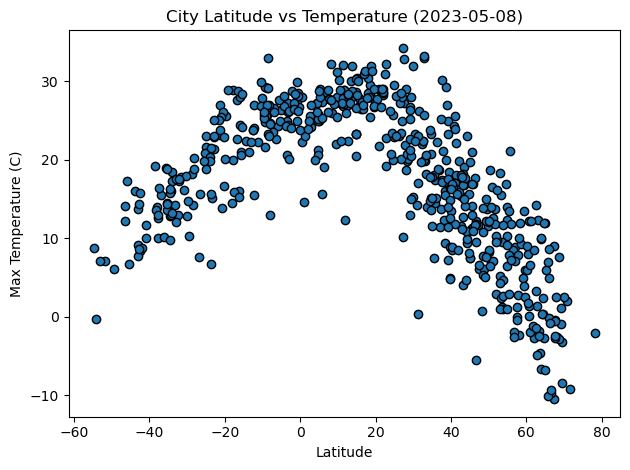

In [8]:
# Build scatter plot for latitude vs. temperature

# Retrieving current date
date_now = datetime.date(datetime.now())

# Setting axis for scatter ploy
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

#Creating Scatter Plot
fig1, scatter = plt.subplots()
plt.scatter(x_axis, y_axis, edgecolor="black", linewidth=1, marker="o")

# Setting labels and title for scatter plot
plt.title(f"City Latitude vs Temperature ({date_now})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# display the scatter plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Humidity

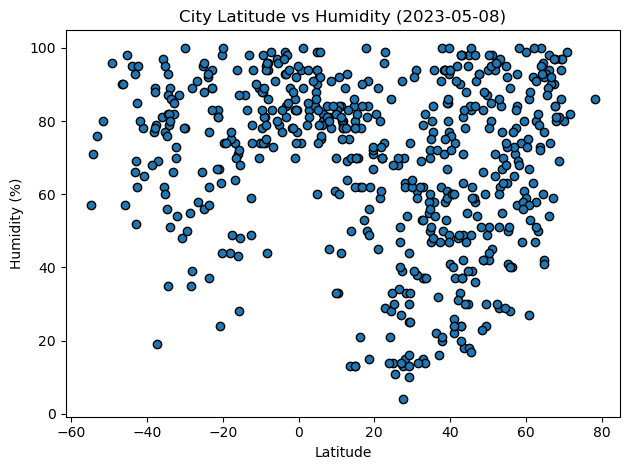

In [9]:
# Build the scatter plots for latitude vs. humidity

# Retrieving current date
date_now = datetime.date(datetime.now())

# Setting axis for scatter ploy
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

#Creating Scatter Plot
fig1, scatter = plt.subplots()
plt.scatter(x_axis, y_axis, edgecolor="black", linewidth=1, marker="o")

# Setting labels and title for scatter plot
plt.title(f"City Latitude vs Humidity ({date_now})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# display the scatter plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Cloudiness

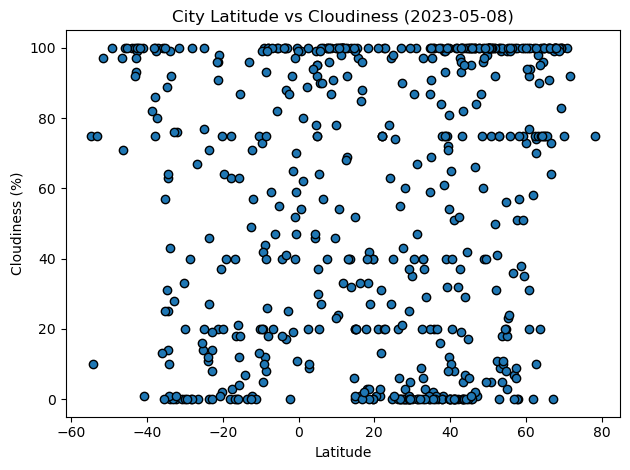

In [10]:
# Build the scatter plots for latitude vs. cloudiness

# Retrieving current date
date_now = datetime.date(datetime.now())

# Setting axis for scatter ploy
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

#Creating Scatter Plot
fig1, scatter = plt.subplots()
plt.scatter(x_axis, y_axis, edgecolor="black", linewidth=1, marker="o")

# Setting labels and title for scatter plot
plt.title(f"City Latitude vs Cloudiness ({date_now})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# display the scatter plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

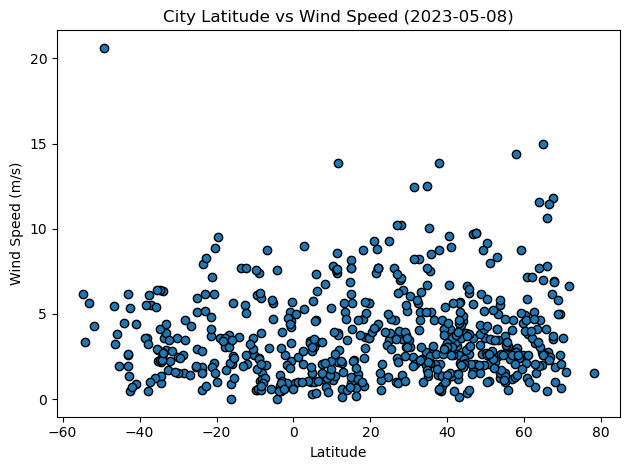

In [11]:
# Build the scatter plots for latitude vs. wind speed

# Retrieving current date
date_now = datetime.date(datetime.now())

# Setting axis for scatter ploy
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

#Creating Scatter Plot
fig1, scatter = plt.subplots()
plt.scatter(x_axis, y_axis, edgecolor="black", linewidth=1, marker="o")

# Setting labels and title for scatter plot
plt.title(f"City Latitude vs Wind Speed ({date_now})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# display the scatter plot
plt.tight_layout()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linregress(x_value, y_value, title, y_label, text_coordinates):
    
    # Retrieving current date
    date_now = datetime.date(datetime.now())
    
    # function for setting up Linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    df_regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    
    # function for creating the regression scatter plots
    plt.plot(x_value,df_regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # function for creating labels and title for the regression scatter plots
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shostka,51.8630,33.4698,2.91,71,92,3.49,UA,2023-05-08 23:26:49
1,sitka,57.0531,-135.3300,8.94,71,100,4.63,US,2023-05-08 23:20:13
2,tiksi,71.6872,128.8694,-9.16,82,92,6.64,RU,2023-05-08 23:20:56
6,bodo,67.2800,14.4050,9.02,59,0,6.17,NO,2023-05-08 23:23:14
7,utrik,11.2278,169.8474,26.89,84,100,8.57,MH,2023-05-08 23:22:34


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,auki,-8.7676,160.7034,29.21,74,44,1.08,SB,2023-05-08 23:23:24
4,tolanaro,-25.0319,46.9987,23.04,88,20,5.14,MG,2023-05-08 23:22:13
5,waitangi,-43.9535,-176.5597,16.01,95,100,4.47,NZ,2023-05-08 23:21:49
8,bredasdorp,-34.5322,20.0403,12.85,93,25,0.97,ZA,2023-05-08 23:20:59
9,adamstown,-25.0660,-130.1015,21.58,56,100,5.94,PN,2023-05-08 23:22:33


###  Temperature vs. Latitude Linear Regression Plot

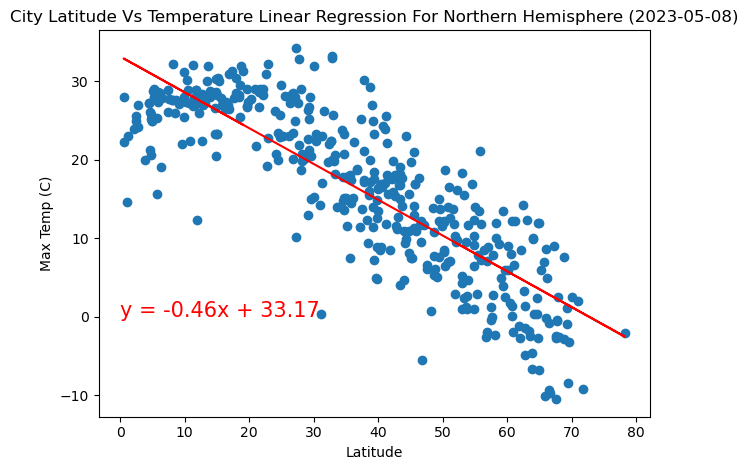

The r-value is -0.84


In [15]:
# Linear regression on Northern Hemisphere

# Setting Values for regression scatter plot
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']

# Setting labels and title for regression scatter plot
title = (f"City Latitude Vs Temperature Linear Regression For Northern Hemisphere ({date_now})")
plt.xlabel
y_label = "Max Temp (C)"

# Creating and displaying regression scatter plot
plot_linregress(x_value, y_value, title, y_label, (0,0))

# Printing correlation coefficient
print(f"The r-value is {round(st.pearsonr(x_value,y_value)[0],2)}")

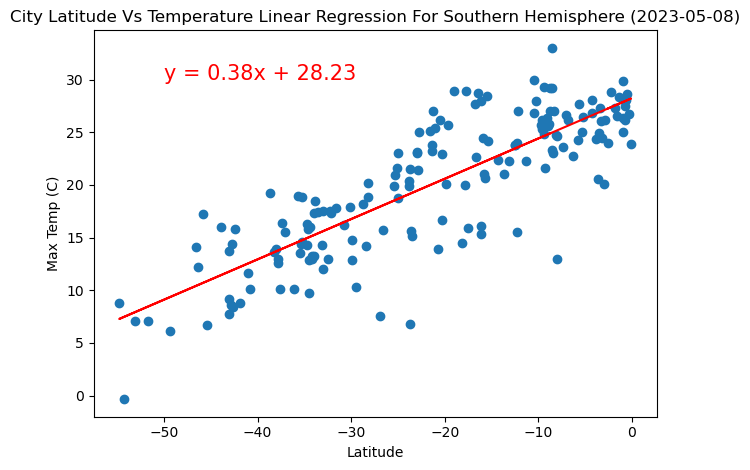

The r-value is 0.83


In [16]:
# Linear regression on Southern Hemisphere

# Setting Values for regression scatter plot
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']

# Setting labels and title for regression scatter plot
title = (f"City Latitude Vs Temperature Linear Regression For Southern Hemisphere ({date_now})")
plt.xlabel
y_label = "Max Temp (C)"

# Creating and displaying regression scatter plot
plot_linregress(x_value, y_value, title, y_label, (-50,30))

# Printing correlation coefficient
print(f"The r-value is {round(st.pearsonr(x_value,y_value)[0],2)}")

**Discussion about the linear relationship:** 

-For the northern hemisphere there is a strong negative inverse correlation between temperature and latitude. As the latitude increases the temperature decreases

-For the southern hemisphere there is a strong positive correlation between temperature and latitude. As the latitude increases the temperature increases

### Humidity vs. Latitude Linear Regression Plot

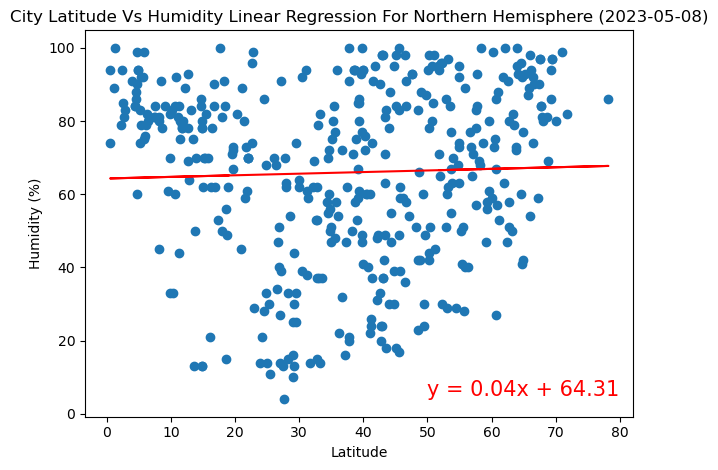

The r-value is 0.03


In [17]:
# Northern Hemisphere

# Setting Values for regression scatter plot
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']

# Setting labels and title for regression scatter plot
title = (f"City Latitude Vs Humidity Linear Regression For Northern Hemisphere ({date_now})")
plt.xlabel
y_label = "Humidity (%)"

# Creating and displaying regression scatter plot
plot_linregress(x_value, y_value, title, y_label, (50,5))

# Printing correlation coefficient
print(f"The r-value is {round(st.pearsonr(x_value,y_value)[0],2)}")

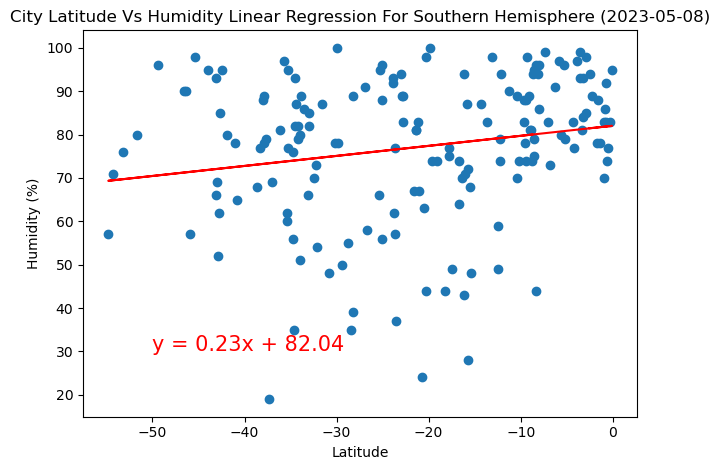

The r-value is 0.2


In [18]:
# Southern Hemisphere

# Setting Values for regression scatter plot
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']

# Creating and displaying regression scatter plot
title = (f"City Latitude Vs Humidity Linear Regression For Southern Hemisphere ({date_now})")
plt.xlabel
y_label = "Humidity (%)"

# Creating and displaying regression scatter plot
plot_linregress(x_value, y_value, title, y_label, (-50,30))

# Printing correlation coefficient
print(f"The r-value is {round(st.pearsonr(x_value,y_value)[0],2)}")

**Discussion about the linear relationship:**

-For the northern hemisphere there is a weak positive correlation between humidity and latitude.

-For the southern hemisphere there is a weak positive correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

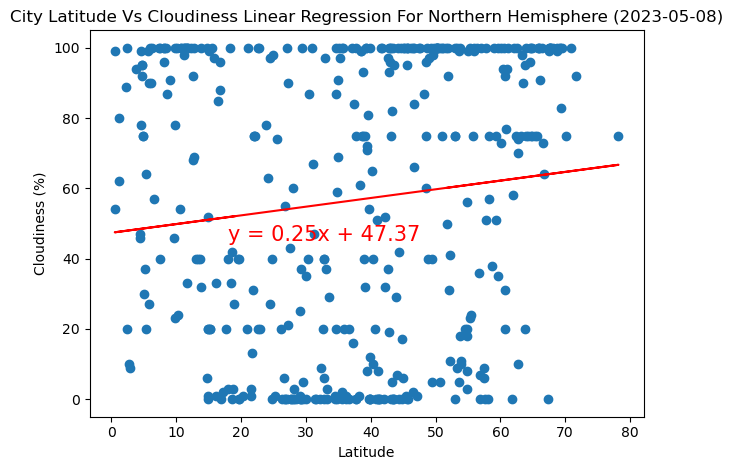

The r-value is 0.12


In [19]:
# Northern Hemisphere

# Setting Values for regression scatter plot
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']

# Setting labels and title for regression scatter plot
title = (f"City Latitude Vs Cloudiness Linear Regression For Northern Hemisphere ({date_now})")
plt.xlabel
y_label = "Cloudiness (%)"

# Creating and displaying regression scatter plot
plot_linregress(x_value, y_value, title, y_label, (18,45))

# Printing correlation coefficient
print(f"The r-value is {round(st.pearsonr(x_value,y_value)[0],2)}")

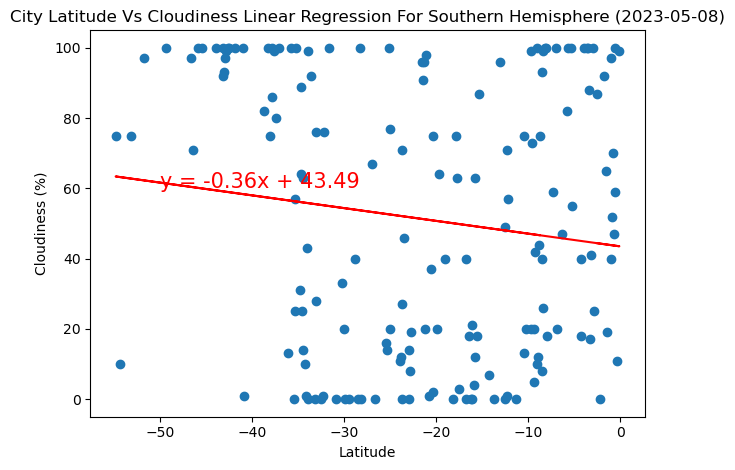

The r-value is -0.14


In [20]:
# Southern Hemisphere

# Setting Values for regression scatter plot
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']

# Setting labels and title for regression scatter plot
title = (f"City Latitude Vs Cloudiness Linear Regression For Southern Hemisphere ({date_now})")
plt.xlabel
y_label = "Cloudiness (%)"

# Creating and displaying regression scatter plot
plot_linregress(x_value, y_value, title, y_label, (-50,60))

# Printing correlation coefficient
print(f"The r-value is {round(st.pearsonr(x_value,y_value)[0],2)}")

**Discussion about the linear relationship:** 


-For the northern hemisphere there is a weak positive correlation between cloudiness and latitude.

-For the southern hemisphere there is a weak negative inverse correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

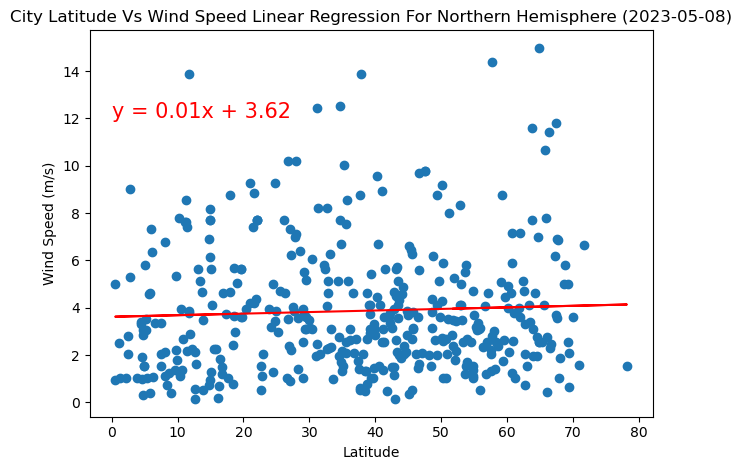

The r-value is 0.05


In [21]:
# Northern Hemisphere

# Setting Values for regression scatter plot
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']

# Setting labels and title for regression scatter plot
title = (f"City Latitude Vs Wind Speed Linear Regression For Northern Hemisphere ({date_now})")
plt.xlabel
y_label = "Wind Speed (m/s)"

# Creating and displaying regression scatter plot
plot_linregress(x_value, y_value, title, y_label, (0,12))

# Printing correlation coefficient
print(f"The r-value is {round(st.pearsonr(x_value,y_value)[0],2)}")

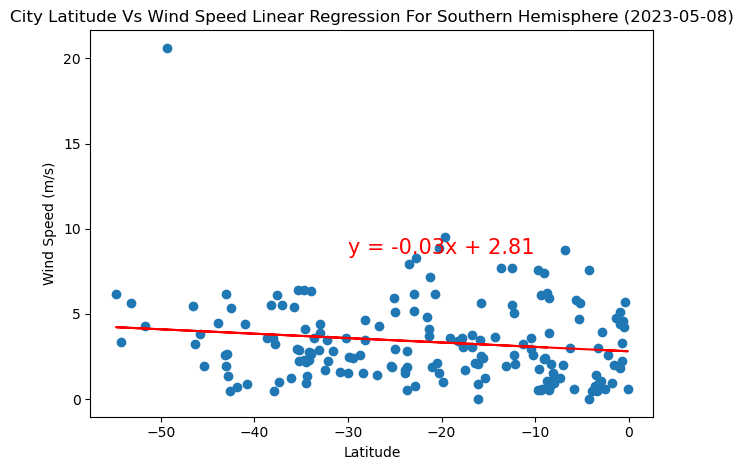

The r-value is -0.15


In [22]:
# Southern Hemisphere

# Setting Values for regression scatter plot
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']

# Setting labels and title for regression scatter plot
title = (f"City Latitude Vs Wind Speed Linear Regression For Southern Hemisphere ({date_now})")
plt.xlabel
y_label = "Wind Speed (m/s)"

# Creating and displaying regression scatter plot
plot_linregress(x_value, y_value, title, y_label, (-30,8.5))

# Printing correlation coefficient
print(f"The r-value is {round(st.pearsonr(x_value,y_value)[0],2)}")

**Discussion about the linear relationship:**


-For the northern hemisphere there is a weak positive correlation between wind speed and latitude.

-For the southern hemisphere there is a weak negative inverse correlation between wind speed and latitude.